# VII Logistic Regression as a Nonlinear classifier

<code>**Logistic regression is known and used as a linear classifier.**</code>
<br>
It is used to come up with a hyperplane in feature space to separate observations that belong to a class from all the other observations that do not belong to that class.<br> The decision boundary is thus <code>**linear**</code>.<br>

While logistic regression makes core assumptions about the observations such as <code>**[IID](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)**</code> (each observation is independent of the others and they all have an identical probability distribution), the use of a linear decision boundary is not one of them. The linear decision boundary is used for reasons of simplicity. In those cases where we suspect the decision boundary to be nonlinear, it may make sense to <code>**formulate logistic regression with a nonlinear model**</code> and evaluate how much better we can do.

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
%matplotlib inline
#%matplotlib notebook

In [132]:
# from sklearn.datasets import make_classification
# X, y = make_classification(
#         n_samples=100, 
#         n_classes=2,
#         n_features=2, 
#         n_informative=2, 
#         n_redundant=0,
#         random_state=0,
#         n_clusters_per_class=2,
#         flip_y=0.25
# )

In [292]:
data = pd.read_csv('dataset/a_sample.csv')
data.head()

,x1,x2,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


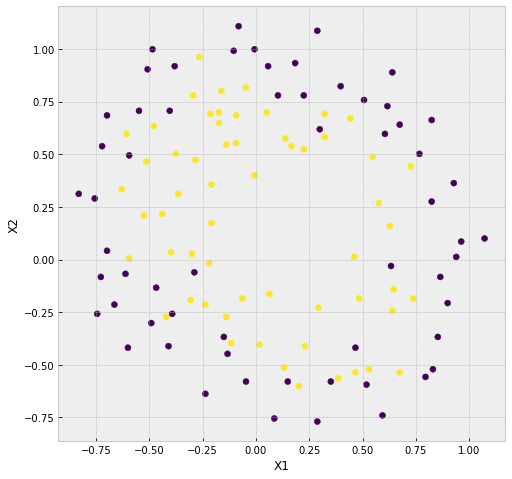

In [290]:
plt.subplots(figsize=(8,8))
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(data.x1, data.x2, c=data.label);

Positive and negative examples are not linearly seperable. We have to add additional higher order polynomial features.

## Generate polynomials

Firstly lets do it with first order polynomial <code>**degree = 1**</code> (that is just a line)

In [77]:
a = np.array(('a',2,3))
b = np.array((8, 0,'d'))
np.column_stack((a,b))

array([['a', '8'],
       ['2', '0'],
       ['3', 'd']], dtype='<U11')

In [216]:
degree = 1
def mapFeature(x1, x2, degree, include_bias=False):
    polynomial = np.ones(x1.shape[0])
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            polynomial = np.column_stack((polynomial, (x1 ** (i-j)) * (x2 ** j)))
    
    if include_bias:
        return polynomial
    else:
        return polynomial[:,1:]

In [ ]:
#from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# poly = PolynomialFeatures(2, include_bias=False)
# X_ = poly.fit_transform(X)
# X_.shape

<code>**[a, b, a^2, ab, b^2]**</code>

In [306]:
X = data[["x1", "x2"]]

In [347]:
X

,x1,x2
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
...,...,...
113,-0.720620,0.538740
114,-0.593890,0.494880
115,-0.484450,0.999270
116,-0.006336,0.999270


In [372]:
X_poly = mapFeature(X.x1.values, X.x2.values, degree=27)

In [373]:
X_poly.shape

(118, 405)

In [374]:
X_poly.shape

(118, 405)

In [375]:
y = data.label.values.reshape(-1,1)

In [376]:
y.shape

(118, 1)

In [377]:
class LogisticRegression:
    def __init__(self, alpha=0.1, iters=100, fit_intercept='True'):
        self.__alpha         = alpha
        self.__iters         = iters
        self.__weights       = []
        self.__cost        = []
        self.__fit_intercept = fit_intercept
    
    
    def _cost_function(self, act, y):
        m = len(y)
        return (1 / m) * (np.sum(-y.T.dot(np.log(act)) - (1 - y).T.dot(np.log(1 - act))))
    
    def fit(self, X, y):
        if self.__fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        #print("Fitting the given dataset")
        m, n = X.shape
        self.__weights = np.zeros(n).reshape(-1, 1)
        for _ in range(self.__iters):
            act = self.activation(X)
            loss = self._cost_function(act, y)
            gradient = np.dot(X.T, (act - y)) / m
            self.__weights -= self.__alpha * gradient
            self.__cost.append(loss)           


    def activation(self, X):
        z = X.dot(self.__weights)
        return self.sigmoid(z)

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def predict(self, X):
        if self.__fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        act = self.activation(X)
        return np.where(act < 0.5, 0, 1)
    
    def accuracy(self,X, y):
        return np.sum(self.predict(X) == y) / len(y)
    
    def _plot_cost(self):
        fig = plt.figure(figsize=(16,8))
        plt.plot(range(len(self.__cost)),self.__cost, label='convergence')
        plt.xlabel("iterations")
        plt.ylabel("cost")
        plt.legend()
        plt.show()
    
    def get_errors(self):
        return self.__errors

    def get_coef(self):
        return self.__weights

In [378]:
lgr = LogisticRegression(iters=10000)
lgr.__dict__

{'_LogisticRegression__alpha': 0.1,
 '_LogisticRegression__iters': 10000,
 '_LogisticRegression__weights': [],
 '_LogisticRegression__cost': [],
 '_LogisticRegression__fit_intercept': 'True'}

In [379]:
from sklearn.model_selection import train_test_split

In [380]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, 
    y, 
    train_size=.8, 
    stratify=y,
    random_state=123
)

In [381]:
lgr.fit(X_train, y_train)

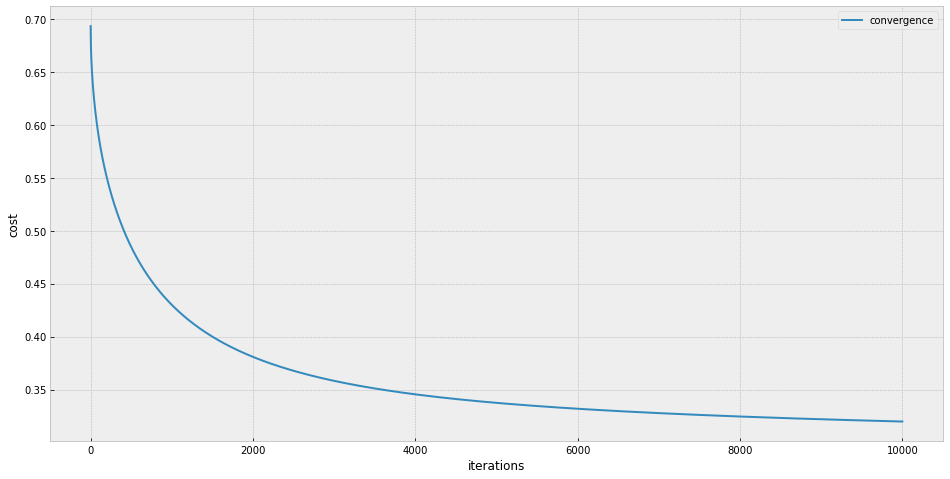

In [382]:
lgr._plot_cost()

In [383]:
y_pred = lgr.predict(X_test)
y_pred.flatten()

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

In [384]:
score = lgr.accuracy(X_test, y_test)
score * 100 

75.0

In [385]:
from sklearn.metrics import accuracy_score

In [386]:
skl_score = accuracy_score(y_test, y_pred)
skl_score * 100

75.0

In [387]:
def decision_boundary(theta, degree=1):
    x = np.linspace(-1, 1.5, 50)
    y = np.linspace(-1, 1.5, 50)
    X, Y = np.meshgrid(x,y)
    # convert X, Y to vectors for calculating additional features
    # using vectorized implementation
    X = np.ravel(X)
    Y = np.ravel(Y)
    h = np.zeros((len(x) * len(y)))
    
    X_poly = mapFeature(X, Y, degree)
    X_poly = np.insert(X_poly, 0, 1, axis=1)
    h = X_poly.dot(theta)
    
    # reshape X, Y, h back to matrix
    X = X.reshape((len(x), len(y)))
    Y = Y.reshape((len(x), len(y)))
    h = h.reshape((len(x), len(y)))
   
    # TODO: make axes.fill_between()
    plot = plt.contour(X, Y, h, levels=[0], cmap="gray")
    return plot

In [388]:
theta = lgr.get_coef()
theta.shape

(406, 1)

Linear seperation is just a special case even though we know the data is not linearly seperable we can see what kind of decision boundary this would yield

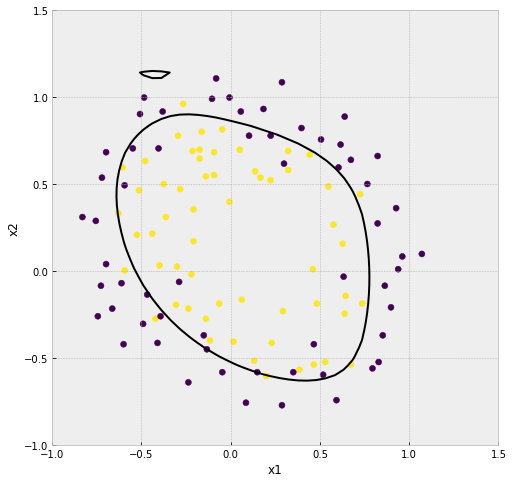

In [391]:
plt.subplots(figsize=(8,8))
plt.scatter(data.x1, data.x2, c=data.label)
plt.xlabel('x1')
plt.ylabel('x2')
decision_boundary(theta, degree=27);

As expected this model underfitting the data. Model has high bias and low variance. i.e is biased towards assuming the data is linearly seperable while in fact its not.<br>
Lets try giving a higher degree for the polynomial features

In [369]:
degree = 6
X_poly = mapFeature(X.x1, X.x2, degree)

In [370]:
X_poly.shape

(118, 27)

In [371]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, 
    y, 
    train_size=.8, 
    stratify=y,
    random_state=123
)

In [190]:
lgr = LogisticRegression(iters=10000)
lgr.__dict__

{'_LogisticRegression__alpha': 0.1,
 '_LogisticRegression__iters': 10000,
 '_LogisticRegression__weights': [],
 '_LogisticRegression__cost': [],
 '_LogisticRegression__fit_intercept': 'True'}

In [191]:
lgr.fit(X_train, y_train)

In [193]:
theta = lgr.get_coef()
theta

array([[ 3.8440648 ],
       [ 2.14326354],
       [ 2.96315549],
       [-9.089281  ],
       [-5.15225454],
       [-8.12539678]])

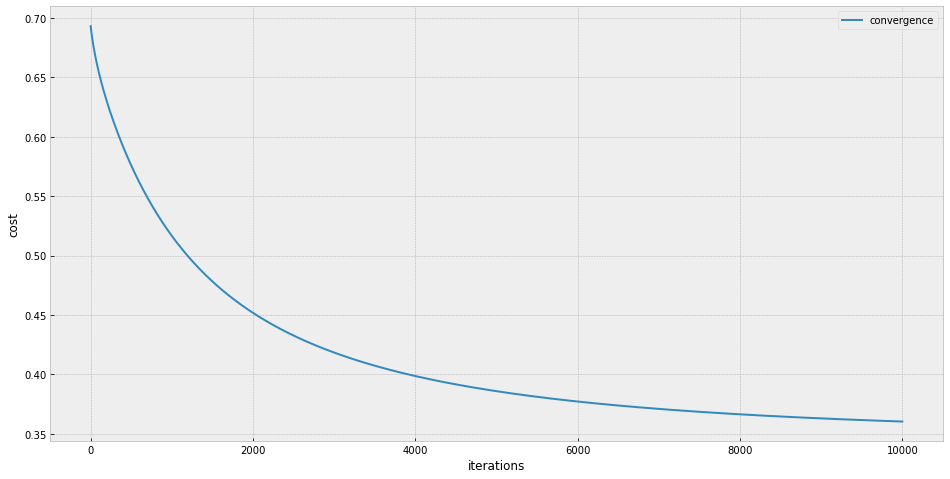

In [194]:
lgr._plot_cost()

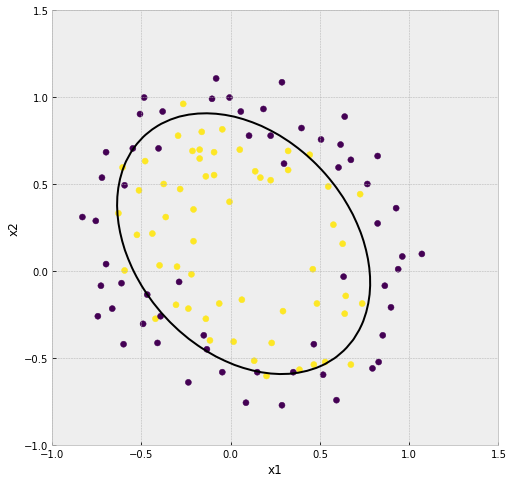

In [195]:
plt.subplots(figsize=(8,8))
plt.scatter(data.x1, data.x2, c=data.label)
plt.xlabel('x1')
plt.ylabel('x2')

decision_boundary(theta, degree);

In [219]:
y_pred = lgr.predict(X_test)
y_pred.flatten()

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1])

In [220]:
score = accuracy_score(y_pred, y_test)
score

0.875

<div class="alert alert-block alert-success">

<h2>Practice exercise</h2>
Lets see the other extreme end of the model by add very high degree for the polynomial features
</div>

In [281]:
def cost(theta, X, y):
    m, n  = X.shape
    z = X.dot(theta)
    act = sigmoid(z)
    return (np.sum(-y.T.dot(np.log(act)) - (1 - y).T.dot(np.log(1 - act)))) / m 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

The model tries pretty hard to capture every single example perfectly and <code>**overfits the data**</code>. This kind of model has <code>**low bias and high variance**</code>. The model has not pre-conceived notion about the seperation of the classes of examples and pretty much can fit any kind of data. <code>**It's very likely that this model will fail in predicting the correct classification when it sees new examples.**</code>

As in [regularization lecture](./__VI_Regularization.ipynb). We have to penalize the algorithm when it tries to overfit by adding a regularization term to the cost function.<br>


\begin{multline*}
J(\theta) = -\dfrac{1}{m}[ \sum_{i=1}^{m} y^{(i)}\log(h_{\theta}(x^{(i)})) + (1 -y^{(i)})\log(1 - h_{\theta}(x^{(i)}))] + \dfrac{\lambda}{2m} \sum_{j=1}^n \theta_{j}^{2}
\end{multline*}

 * <code>**λ regularization factor**</code>
 * <code>**n number of features**</code> 
 
<code>**NOTE:The regularization term does include the intercept term 𝜃0!**</code> 

In [263]:
def cost(theta, X, y, alpha):
    m, n  = X.shape
    z = X.dot(theta)
    act = sigmoid(z)
    J = (np.sum(-y.T.dot(np.log(act)) - (1 - y).T.dot(np.log(1 - act)))) / m 
    reg_term = (alpha * sum(theta[1:] ** 2)) / (2 * m)
    return J + reg_term

As we see that the regularization prevented the <code>**degree = 6**</code> overfitted model, to now provide a much smoother decision boundary. But keep in mind that having too much regularization negatively affects the model,  it will be high bias towards a some <code>**combinations of "x1" and "x2"**</code>.